### Analyzing the Stroop Effect
Perform the analysis in the space below. Remember to follow [the instructions](https://docs.google.com/document/d/1-OkpZLjG_kX9J6LIQ5IltsqMzVWjh36QpnP2RYpVdPU/pub?embedded=True) and review the [project rubric](https://review.udacity.com/#!/rubrics/71/view) before submitting. Once you've completed the analysis and write up, download this file as a PDF or HTML file and submit in the next section.


(1) What is the independent variable? What is the dependent variable?

The independent variable in this case is whether the this is a congruent or incongruent case
and the dependent variable would be the time/duration for each case.

(2) What is an appropriate set of hypotheses for this task? What kind of statistical test do you expect to perform? Justify your choices.

In the Null hypothesis, duration of the incongruent case will be less than or equal to the congruent case.i.e the mismatch in colour and words will have no effect or decrease the duration in deciding the colour

Then the alterante hypothesis would state that there is significant differnce in the duration i.e the mismatch in colour and words will increase the duration is assessing the colour when the word doesn't match with color.

$$ H_0: mu_{incongruent} - mu_{congruent} < = 0  $$
$$ H_1: mu_{incongruent} - mu_{incongruent} > 0 $$

Confidence interval of 95% with alpha =0.05 type1 error rate

<u>HTML Statistics test:</u>
========

    Can we perform a Z-test
      NO. In this case the total size of our sample is only 24 whereas Z-test is used when sample size is >= 30
      We dont know the population paramaters such as the standard deviation and mean
      
 <u>Justification for choices:</u>
 =============
     * Here we will use a t-test to test our hypothesis
         * t-test can be applied for sample size less than 30 and the population paramaters such as the standard deviation and mean need to be known.
         * t-test applies also for distributions that follow a nearly normal distribution
         * We will be using a paired one tailed t-test, (in this case a right tailed as H_1 > 0) as we are conducting two sets of tests on the same participant.
         
          

(3) Report some descriptive statistics regarding this dataset. Include at least one measure of central tendency and at least one measure of variability. The name of the data file is 'stroopdata.csv'.

In [40]:
# Perform the analysis here

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats # we need this for the t-table to get the p-vales

In [4]:
df = pd.read_csv('stroopdata.csv')
df.head()

,Congruent,Incongruent
0,12.079,19.278
1,16.791,18.741
2,9.564,21.214
3,8.630,15.687
4,14.669,22.803


In [5]:
df.describe()

,Congruent,Incongruent
count,24.000000,24.000000
mean,14.051125,22.015917
std,3.559358,4.797057
min,8.630000,15.687000
25%,11.895250,18.716750
50%,14.356500,21.017500
75%,16.200750,24.051500
max,22.328000,35.255000


Size of the sample: 24

--write answer here--

(4) Provide one or two visualizations that show the distribution of the sample data. Write one or two sentences noting what you observe about the plot or plots.

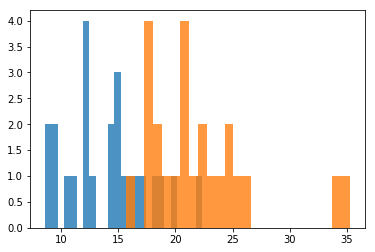

In [46]:
# Plot a histogram to see how the distribution looks like
plt.hist(df['Congruent'], alpha=0.8, bins=25);
plt.hist(df['Incongruent'], alpha=0.8, bins=25);
plt.show();

In [18]:
# A box plot
# From the box plot it looks like there are 2 outliers and we can see the same in the histogram also

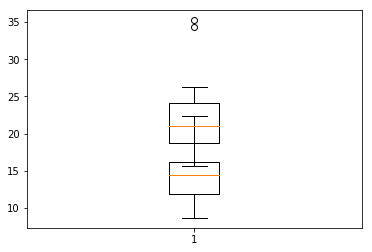

In [61]:
plt.boxplot(df['Congruent']);
plt.boxplot(df['Incongruent']);

From the histogram, the graphs appear to be positively skewed for both distribution with some missing values observed. However the mean of both populations appear to be same as the peak and this would indicate a normal distribution.

(5) Now, perform the statistical test and report the results. What is the confidence level and your critical statistic value? Do you reject the null hypothesis or fail to reject it? Come to a conclusion in terms of the experiment task. Did the results match up with your expectations?

In [19]:
df.describe()

,Congruent,Incongruent
count,24.000000,24.000000
mean,14.051125,22.015917
std,3.559358,4.797057
min,8.630000,15.687000
25%,11.895250,18.716750
50%,14.356500,21.017500
75%,16.200750,24.051500
max,22.328000,35.255000


In [25]:
# Calculate the median
# since the population looks to be positively skewed, median could be a better representation than mean for central tendency.

np.median(df['Congruent']), np.median(df['Incongruent'])
print('Congruent median duration :', np.median(df['Congruent']))
print('\nIncongruent median duration :', np.median(df['Congruent']))

Congruent median duration : 14.3565

Incongruent median duration : 14.3565


In [27]:
# T-test
# Calculate the difference in mean between the 2 observation
diff = df['Incongruent'].mean() - df['Congruent'].mean()
diff

7.9647916666666667

In [29]:
# insert a new column - difference in duration
df.insert(2, 'duration_diff', df['Incongruent'] - df['Congruent'])
df.head()

,Congruent,Incongruent,duration_diff
0,12.079,19.278,7.199
1,16.791,18.741,1.950
2,9.564,21.214,11.650
3,8.630,15.687,7.057
4,14.669,22.803,8.134


In [31]:
# Mean of the differences
np.mean(df['duration_diff'])

7.9647916666666658

In [32]:
# calculate the standard deviation of the differnces in duration
np.std(df['duration_diff'])

4.7623980302221582

In [36]:
# standard error(SE) of the mean difference
# SE(differnces) = standard deviation / square root(sample size)

#square root(sample size)
np.sqrt(24)

# standard error(SE) of the mean difference calculated as
SE_diff = np.std(df['duration_diff']) / np.sqrt(24)
SE_diff

0.97212042717333247

In [38]:
# T-statistic
# denoted by T = mean of the difference / SE(differences)
t = np.mean(df['duration_diff']) / SE_diff
t

8.1932150009707758

In [49]:
# Since this is a right tailed t-test, pvalue should be calculated as 1- cdf(ts)
# Since I couldn't find a p-value for the test statistic from the t-tables, I used this function stats from scipy
(1 -stats.t.cdf(t, df=df['duration_diff'])).mean()
# This is the p-value

0.0010591111975152094

The p-value of 0.0010591111975152094 calculated is less than type 1 error rate, alpha =0.05 and hence the null hypothesis has to be rejected, which means the duration of incongruent is greater than the congreunt case

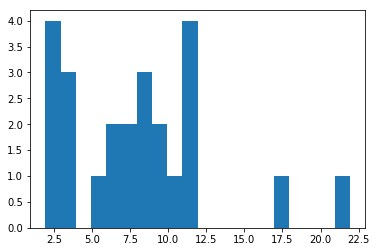

In [47]:
# PLotting a distribution for the difference in mean of duration
plt.hist(df['duration_diff'], bins=20);

**Summary**

- Confidence interval was 95% with 5% Type 1 error rate.
    - Mean duration for the congruent population: 14.05 sec
    - Mean duration for the incongruent population: 22.09 sec
    - standard deviation for the duration for the congruent pop is 3.55 sec
    - standard deviation for the duration for the incongruent pop is 4.79 sec
    - Congruent median duration : 14.3565
    - Incongruent median duration : 14.3565
    - Mean of the differences:7.9647916666666658
    - standard deviation of the differnces in duration: 4.7623980302221582
    - standard error(SE) of the mean difference:0.97212042717333247
    - t- value from t-test = 8.1932150009707758
    - p-value from t-test = 0.0010591111975152094

__The p-value of 0.0010591111975152094 calculated is less than type 1 error rate, alpha =0.05 and hence the null hypothesis has to be rejected, which means the duration of incongruent is greater than the congruent case. This indeed matches with our expectation as we can see the difference in our actual data.__

**References**:
    
- https://support.minitab.com/en-us/minitab/18/help-and-how-to/statistics/basic-statistics/supporting-topics/basics/manually-calculate-a-p-value/
- https://onlinecourses.science.psu.edu/stat414/node/269
- http://www.statisticshowto.com/probability-and-statistics/hypothesis-testing/t-score-vs-z-score/
- https://www.youtube.com/watch?v=KLnGOL_AUgA
- [calculating p-value using scipy stats]https://towardsdatascience.com/inferential-statistics-series-t-test-using-numpy-2718f8f9bf2f